<a href="https://colab.research.google.com/github/awangberg/Math242_Linear_algebra_code_projects/blob/master/Gram_Schmidt_Process_with_Poynomial_Function_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Related Youtube Video on a talking piano by Mark Rober - watch before completing the activity:  https://www.youtube.com/watch?v=uBEL3YVzMwk



# Gram-Schmidt Process with Function Spaces

1. Project 1: Polynomial spaces
  1. Choose a "random" basis for polynomials of degree 4 or less on the interval $$ -2 \le t \le 2 $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Go through the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functions in the orthonormal basis.


2. Project 2: Homework for this project:
  1. Choose a "random" basis for periodic functions on the interval $$ -\pi \le t \le \pi $$
  2. Create the inner product (dot product) and norm (magnitude) functions
  3. Do the Gram-Schmidt process to turn the random basis into a nice orthonormal basis
  4. Write some different functiosn in the orthonormal basis.

In [1]:
#  Libraries that we'll need:
import numpy as np
import sympy as sym
from sympy.plotting import plot
#import matplotlib.pyplot as plt

# We'll specify that x and t are variables:
x, t = sym.symbols('x, t')

## Project 1: Create an Orthonormal Basis for Polynomial Spaces

### 1. Choose a "random" basis for polynomials of degree 4 or less on the interval $$ -2 \le t \le 2 $$

In [2]:
# Our "random" vectors:
# 1,  x,  x**2,  x**3,  x**4
r0 = 1
r1 = x
r2 = x**2
r3 = x**3
r4 = x**4

### 2. Create the inner product (dot product) and norm (magnitude) functions

We'll generalize the notion of dot product for function spaces.  We know the dot product of two vectors in $$\vec{u}, \vec{v} \in \mathbf{R}^n$$
is given by

$$ \vec{u} \cdot \vec{v} = \left( \begin{array}{c}u_1\\u_2\\u_3\\ \vdots \\ u_n\\ \end{array} \right) \cdot \left( \begin{array}{c} v_1\\v_2\\v_3\\ \vdots \\ v_n\\ \end{array} \right) = v_1 \cdot u_1 + v_2 \cdot u_2 + \cdots v_n \cdot u_n $$

which can also be expressed as

$$ \vec{u} \cdot \vec{v} = trace\left( \vec{v}^\dagger \vec{u} \right) $$

When working with function spaces, we can think of representing two functions $f$ and $g$ using samples of points $x_1, x_2, x_3, \cdots x_n$ which are separated by a distance $dx$.  This *discrete* sampling of the functions produces the dot product, or inner product

$$ < f | g > = \left( \begin{array}{c} f(x_1) \\ f(x_2) \\ f(x_3) \\ \vdots \\ f(x_n)\\ \end{array} \right) \cdot \left( \begin{array}{c} g(x_1) \\ g(x_2) \\ g(x_3)\\ \vdots \\ g(x_n)\\ \end{array} \right) \; dx = g(x_1) \cdot f(x_1) \; dx + g(x_2) \cdot f(x_2)\;dx + \cdots + g(x_n) \cdot f(x_n) \; dx $$

If we include more and more points, we get, in the limit, an inner product that works with the *continuous* functions $f$ and $g$:

$$ < f | g > \approx \int_{\textrm Left}^{\textrm Right} g(x) f(x) \; dx $$

or

$$ < f | g > = k \int_{\textrm Left}^{\textrm Right} g(x) f(x) \; dx $$

We'll include a scaling factor $k$ for convenience, so that the inner product of the constant function $f(x) = 1$ with itself will be one.  That is, we'd like

$$< 1 | 1 >  = 1$$




#### Determining the scaling constant for the inner product on $P_4$

Find the scaling constant so that the inner product on the constant function $f(x) = 1$ with itself is 1.

We are working with polynomials of degree $4$ or less on the interval $-2 \le x \le 2$.

In [3]:
sym.integrate(1*1, (x,-2,2))

4

#### Defining the inner product and norm

Using this factor, we'll define our inner product as a function `ip(f,g)` as 

$$ < \, f \, | \, g \, > = \frac{1}{ 4 } \int_{-2}^{2} g(x) \, f(x) \; dx $$

The norm, or magnitude, of a vector $f$ will be given by

$$ \left| f \right| = \sqrt{ < \, f \, | \, f \, > }$$

We'll use this to define our norm function `n(f)`.  Because of our scaling factor we should have the norm of the constant function $f(x) = 1$ as $1$.


In [ ]:
def ip(a,b):
    return (1) * sym.integrate(a*b, (x, -2, 2))

def n(a):
    return sym.sqrt(ip(a,a))

#### Testing the scaling constant on the inner product and norm

We'll check that everything works:  

  * Is $< 1 | 1 > = 1$

  * Is $\left| 1 \right| = 1$?

In [6]:
# check that ip(1,1) = 1 and n(1) = 1:
print("Testing that <1|1> is 1, and |1| = 1: ")
print("ip(1,1) = ", ip(1,1))
print("n(1) = ", n(1))


Testing that <1|1> is 1, and |1| = 1: 
ip(1,1) =  1.00000000000000
n(1) =  1.00000000000000


### 3. Perform the Gram-Schmidt process to create an orthonormal basis from the random basis.

We have the *random* basis

$$ r_0 = 1  \hspace{1cm} r_1 = x \hspace{1cm} r_2 = x^2 \hspace{1cm} r_3 = x^3 \hspace{1cm} r_4 = x^4 $$

We'll use code to perform the Gram-Schmidt Orthonormalization Process to generate the nice *orthonormal* basis given by 

$$ u_0 \hspace{1cm} u_1 \hspace{1cm} u_2 \hspace{1cm} u_3 \hspace{1cm} u_4 $$

This involves four steps:
  1.  Select an unprocessed vector $r_i$ from the random basis
  2.  Find the vector $T_i$ that is perpendicular to the space spanned by $u_0, u_1, \cdots, u_{i-1}$.  That is,
  $$ T_i = r_i - <\, r_i \, | \, u_1 \, > \, u_1 - <\, r_i \, | \, u_2 \, > \, u_2 - \cdots - <\, r_i \, | \, u_{i-1} \, > \, u_{i-1}$$
  3.  Normalized $T_i$ and set it to $u_i$, if it is non-zero:
  $$ u_i = \frac{1}{\left| T_i \right|} T_i \textrm{ if $T_i \ne \vec{0}$ }$$
  4.  Test that $u_i$ has norm 1 and is orthogonal to $u_1, u_2, \cdots, u_{i-1}$:
  $$ \textrm{ Check: } \left| u_i \right| = 1 \textrm{ and } < \, u_i \, | \, u_1 \, > = 0, \cdots, < \, u_i \, | \, u_{i-1} \, > = 0$$



#### Find the first vector $u_0$, and do sanity checks

In [7]:
# Find the orthogonal part to existing u_i's:
T0 = r0
print("T0 = ", T0)

T0 =  1


In [8]:
# Normalize:
print("|T0| = ", n(T0))
u0 = (1/n(T0))*T0
print("u0 = ", u0)

|T0| =  1.00000000000000
u0 =  1.00000000000000


In [9]:
# Check that u0 has size 1 and is orthogonal to prior ui's:
print("Check:  The size of u0 is ", n(u0))
print("Check:  The inner product of u0 and ... is ", ip(u0,u0))

Check:  The size of u0 is  1.00000000000000
Check:  The inner product of u0 and ... is  1.00000000000000


#### Find $u_1$, and do sanity checks

In [10]:
# Find the orthogonal part to the existing u_i's:
T1 = r1 - ip(r1, u0)*u0
print("T1 = ", T1)

T1 =  x


In [11]:
#Normalize
print("|T1| = ", n(T1))
u1 = (1/n(T1))*T1
print("u1 = ", u1)

|T1| =  1.15470053837925
u1 =  0.866025403784439*x


In [12]:
# Check that u1 has size 1 and is orthogonal to prior ui's:
print("Check:  The size of u1 is: ", n(u1))
print("Check:  The inner product of u1 and u0 is: ", ip(u1,u0))

Check:  The size of u1 is:  1.00000000000000
Check:  The inner product of u1 and u0 is:  0


#### Find u_2, and do sanity checks

In [ ]:
# Find the orthogonal part to the existing u_i's:


In [ ]:
# Normalize

In [ ]:
# Check that u2 has size 1 and is orthogonal to prior ui's:

#### Find u_3, and do sanity checks

In [ ]:
# Find the orthogonal part to the existing u_i's: 

In [ ]:
# Normalize

In [ ]:
# Check that u3 has size 1 and is orthogonal to prior ui's:

#### Find u_4, and do sanity checks

In [ ]:
# Find the orthogonal part to the existing u_i's: 

In [ ]:
# Normalize

In [ ]:
# Check that u3 has size 1 and is orthogonal to prior ui's:

In [37]:
#The new basis:
print("The Orthonormal Basis: ")
print("u0 = ", u0)
print("u1 = ", u1)
print("u2 = ", u2)
print("u3 = ", u3)
print("u4 = ", u4)

The Orthonormal Basis: 
u0 =  1.00000000000000
u1 =  0.866025403784439*x
u2 =  0.559016994374947*x**2
u3 =  0.826797284707685*x**3 - 1.98431348329844*x
u4 =  0.65625*x**4 - 1.875*x**2


### Express various functions in the orthonormal basis.

0th approximation to  sin(x)  is:  0


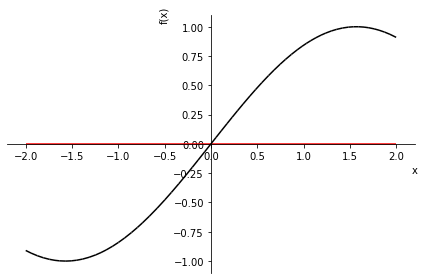

1st approximation to  sin(x)  is:  0.866025403784439*x*(-0.866025403784439*cos(2) + 0.433012701892219*sin(2))


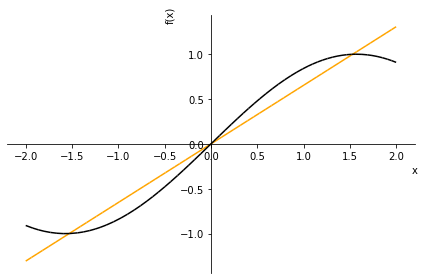

2nd approximation to  sin(x)  is:  0.866025403784439*x*(-0.866025403784439*cos(2) + 0.433012701892219*sin(2))


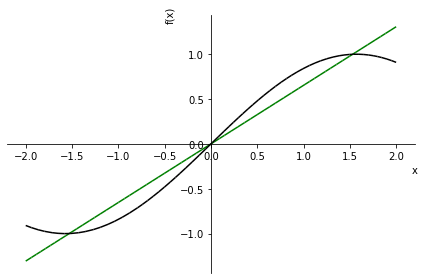

3rd approximation to  sin(x)  is:  0.866025403784439*x*(-0.866025403784439*cos(2) + 0.433012701892219*sin(2)) + (0.826797284707685*x**3 - 1.98431348329844*x)*(3.63790805271381*cos(2) + 1.48823511247383*sin(2))


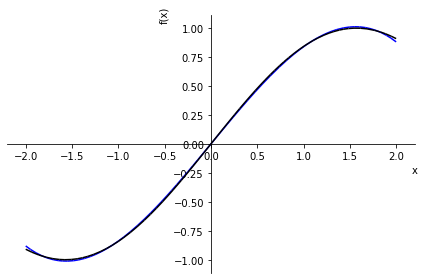

4th approximation to  sin(x)  is:  0.866025403784439*x*(-0.866025403784439*cos(2) + 0.433012701892219*sin(2)) + (0.826797284707685*x**3 - 1.98431348329844*x)*(3.63790805271381*cos(2) + 1.48823511247383*sin(2))


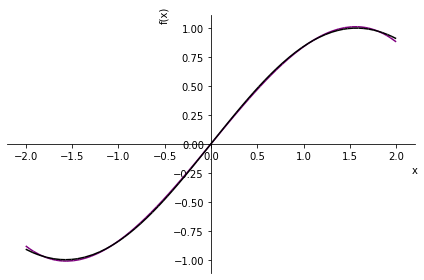

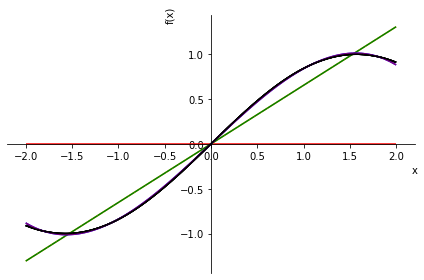

In [25]:
pp = sym.sin(x)
plot_original = plot(pp, (x,-2,2), line_color='black', show=False)
pp0 = ip(pp,u0)*u0 
plot0 = plot(pp0, (x,-2,2), line_color='red', show=False)
print("0th approximation to ", pp , " is: ", pp0)
plot0.extend(plot_original)
plot0.show()

pp1 = ip(pp,u0)*u0 + ip(pp,u1)*u1 
plot1 = plot(pp1, (x,-2,2), line_color='orange', show=False)
print("1st approximation to ", pp , " is: ", pp1)
plot1.extend(plot_original)
plot1.show()

pp2 = ip(pp,u0)*u0 + ip(pp,u1)*u1 + ip(pp,u2)*u2
plot2 = plot(pp2, (x,-2,2), line_color='green', show=False)
print("2nd approximation to ", pp , " is: ", pp2)
plot2.extend(plot_original)
plot2.show()

pp3 = ip(pp,u0)*u0 + ip(pp,u1)*u1 + ip(pp,u2)*u2 + ip(pp,u3)*u3 
plot3 = plot(pp3, (x,-2,2), line_color='blue', show=False)
print("3rd approximation to ", pp , " is: ", pp3)
plot3.extend(plot_original)
plot3.show()

pp4 = ip(pp,u0)*u0 + ip(pp,u1)*u1 + ip(pp,u2)*u2 + ip(pp,u3)*u3 + ip(pp,u4)*u4
plot4 = plot(pp4, (x,-2,2), line_color='purple', show=False)
print("4th approximation to ", pp , " is: ", pp4)
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()

0th aqqroximation to  exp(x)  is:  0.5*sinh(2)


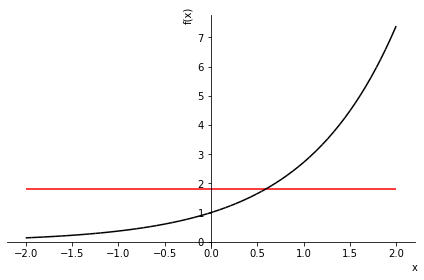

1st aqqroximation to  exp(x)  is:  (0.866025403784439*x*(0.649519052838329 + 0.21650635094611*exp(4)) - 0.25 + 0.25*exp(4))*exp(-2)


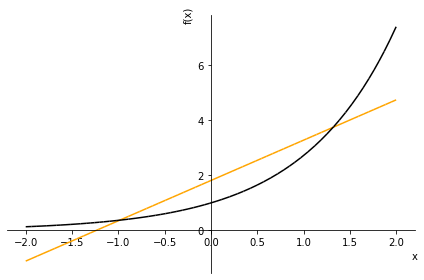

2nd aqqroximation to  exp(x)  is:  (x**2*(-0.78125 + 0.15625*exp(4)) + 0.866025403784439*x*(0.649519052838329 + 0.21650635094611*exp(4)) - 0.25 + 0.25*exp(4))*exp(-2)


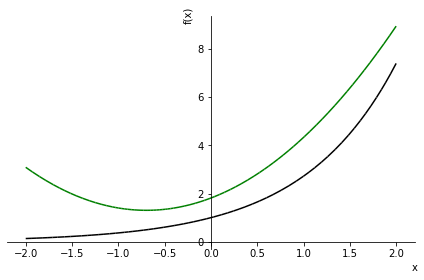

3rd aqqroximation to  exp(x)  is:  (x**2*(-0.78125 + 0.15625*exp(4)) + x*(6.36633909224917 - 0.0826797284707683*exp(4))*(0.826797284707685*x**2 - 1.98431348329844) + 0.866025403784439*x*(0.649519052838329 + 0.21650635094611*exp(4)) - 0.25 + 0.25*exp(4))*exp(-2)


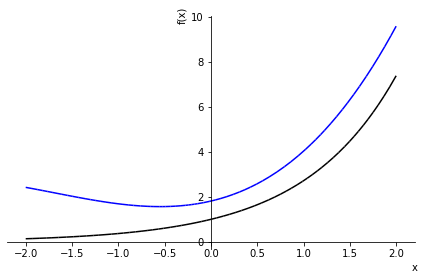

4th aqqroximation to  exp(x)  is:  1.0*(-15.01171875*x**4 + 0.24609375*x**4*exp(4) - 0.0683593749999999*x**3*exp(4) + 5.263671875*x**3 - 0.546875*x**2*exp(4) + 42.109375*x**2 - 12.0703125*x + 0.3515625*x*exp(4) - 0.25 + 0.25*exp(4))*exp(-2)


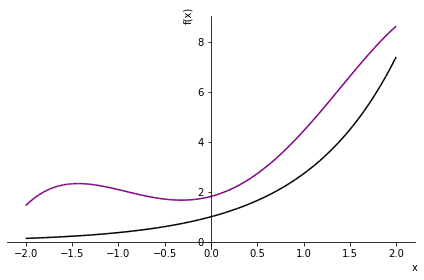

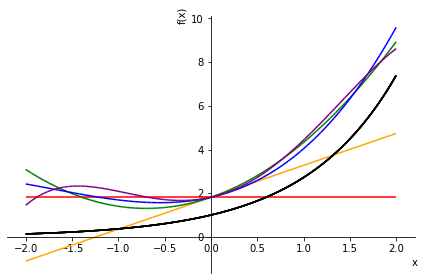

In [29]:
qq = sym.exp(x)
plot_original = plot(qq, (x,-2,2), line_color='black', show=False)
qq0 = ip(qq,u0)*u0 
plot0 = plot(qq0, (x,-2,2), line_color='red', show=False)
print("0th aqqroximation to ", qq , " is: ", sym.simplify(qq0))
plot0.extend(plot_original)
plot0.show()

qq1 = ip(qq,u0)*u0 + ip(qq,u1)*u1 
plot1 = plot(qq1, (x,-2,2), line_color='orange', show=False)
print("1st aqqroximation to ", qq , " is: ", sym.simplify(qq1))
plot1.extend(plot_original)
plot1.show()

qq2 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2
plot2 = plot(qq2, (x,-2,2), line_color='green', show=False)
print("2nd aqqroximation to ", qq , " is: ", sym.simplify(qq2))
plot2.extend(plot_original)
plot2.show()

qq3 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2 + ip(qq,u3)*u3 
plot3 = plot(qq3, (x,-2,2), line_color='blue', show=False)
print("3rd aqqroximation to ", qq , " is: ", sym.simplify(qq3))
plot3.extend(plot_original)
plot3.show()

qq4 = ip(qq,u0)*u0 + ip(qq,u1)*u1 + ip(qq,u2)*u2 + ip(qq,u3)*u3 + ip(qq,u4)*u4
plot4 = plot(qq4, (x,-2,2), line_color='purple', show=False)
print("4th aqqroximation to ", qq , " is: ", sym.simplify(qq4))
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()

0th accroximation to  3*x + 4  is:  4.00000000000000


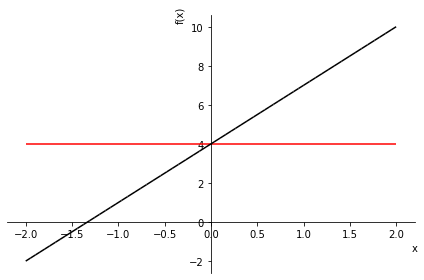

1st accroximation to  3*x + 4  is:  3.0*x + 4.0


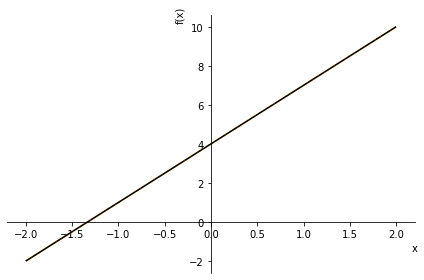

2nd accroximation to  3*x + 4  is:  1.66666666666667*x**2 + 3.0*x + 4.0


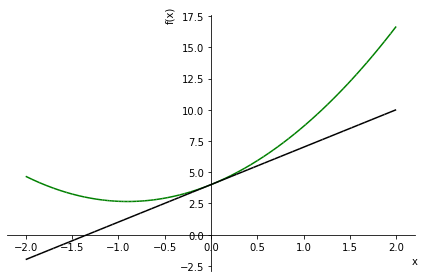

3rd accroximation to  3*x + 4  is:  -1.46868701148805e-15*x**3 + 1.66666666666667*x**2 + 3.0*x + 4.0


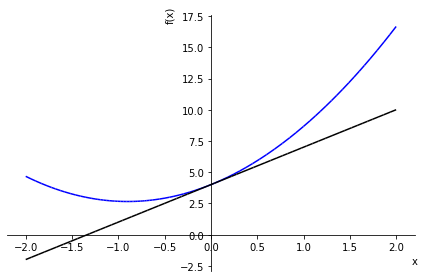

4th accroximation to  3*x + 4  is:  -1.05*x**4 - 1.46868701148805e-15*x**3 + 4.66666666666667*x**2 + 3.0*x + 4.0


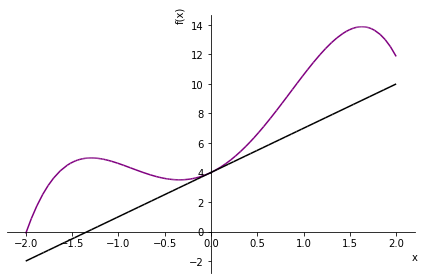

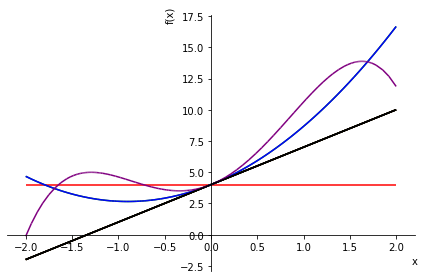

In [35]:
cc = 4 + 3*x 
plot_original = plot(cc, (x,-2,2), line_color='black', show=False)
cc0 = ip(cc,u0)*u0 
plot0 = plot(cc0, (x,-2,2), line_color='red', show=False)
print("0th accroximation to ", cc , " is: ", sym.simplify(cc0))
plot0.extend(plot_original)
plot0.show()

cc1 = ip(cc,u0)*u0 + ip(cc,u1)*u1 
plot1 = plot(cc1, (x,-2,2), line_color='orange', show=False)
print("1st accroximation to ", cc , " is: ", sym.simplify(cc1))
plot1.extend(plot_original)
plot1.show()

cc2 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2
plot2 = plot(cc2, (x,-2,2), line_color='green', show=False)
print("2nd accroximation to ", cc , " is: ", sym.simplify(cc2))
plot2.extend(plot_original)
plot2.show()

cc3 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2 + ip(cc,u3)*u3 
plot3 = plot(cc3, (x,-2,2), line_color='blue', show=False)
print("3rd accroximation to ", cc , " is: ", sym.simplify(cc3))
plot3.extend(plot_original)
plot3.show()

cc4 = ip(cc,u0)*u0 + ip(cc,u1)*u1 + ip(cc,u2)*u2 + ip(cc,u3)*u3 + ip(cc,u4)*u4
plot4 = plot(cc4, (x,-2,2), line_color='purple', show=False)
print("4th accroximation to ", cc , " is: ", sym.simplify(cc4))
plot4.extend(plot_original)
plot4.show()


# plot all of them:
plot_original.extend(plot0)
plot_original.extend(plot1)
plot_original.extend(plot2)
plot_original.extend(plot3)
plot_original.extend(plot4)
plot_original.show()